<a href="https://colab.research.google.com/github/SrinivasanV13/IMAGE-CLASSIFICATION-USING-CNN/blob/main/image_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###   **Small Image Classification Using Convolutional Neural Network (CNN)**

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification**

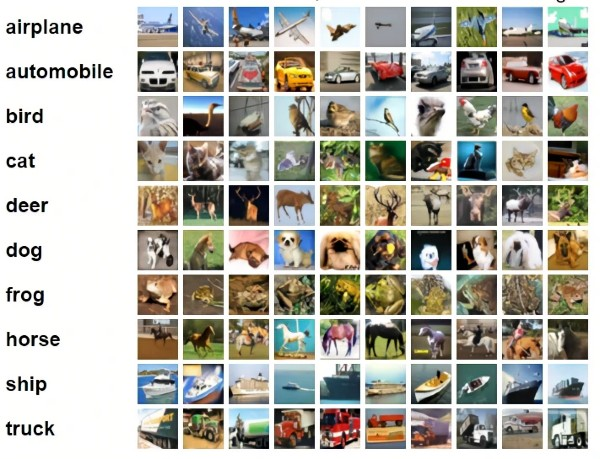

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(X_test.shape)

(10000, 32, 32, 3)


In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
print(y_train.shape)

(50000,)


NameError: name 'classes' is not defined

In [ ]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

NameError: name 'classes' is not defined

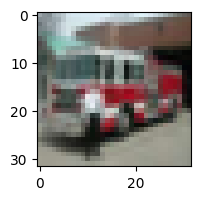

In [ ]:
plot_sample(X_train,y_train,1940)

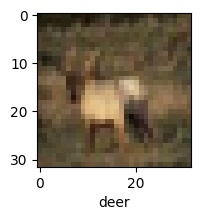

In [ ]:
plot_sample(X_train,y_train,3)

**Normalizing the training data**

In [ ]:
X_train=X_train/255
X_test=X_test/255

Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 11s 4ms/step - loss: 1.8100 - accuracy: 0.3541
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6218 - accuracy: 0.4261
Epoch 3/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5389 - accuracy: 0.4582
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4810 - accuracy: 0.4765
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4307 - accuracy: 0.4955


In [ ]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4635 - accuracy: 0.4779


[1.4634650945663452, 0.4778999984264374]

You can see that at the end of 5 epochs, accuracy is at around 49%

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.43      0.51      1000
           1       0.65      0.55      0.60      1000
           2       0.30      0.50      0.38      1000
           3       0.35      0.36      0.36      1000
           4       0.40      0.42      0.41      1000
           5       0.42      0.34      0.38      1000
           6       0.56      0.48      0.52      1000
           7       0.63      0.47      0.54      1000
           8       0.47      0.76      0.58      1000
           9       0.63      0.46      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.48     10000
weighted avg       0.51      0.48      0.48     10000




Now let us build a convolutional neural network to train our images

---



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=40)

Epoch 1/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5926 - accuracy: 0.7926
Epoch 2/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5643 - accuracy: 0.8019
Epoch 3/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5340 - accuracy: 0.8129
Epoch 4/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5108 - accuracy: 0.8191
Epoch 5/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4825 - accuracy: 0.8299
Epoch 6/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4569 - accuracy: 0.8401
Epoch 7/40
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4401 - accuracy: 0.8428
Epoch 8/40
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4163 - accuracy: 0.8532
Epoch 9/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3951 - accuracy: 0.8588
Epoch 10/40
1563/1563 [==============================] - 7s 4ms/step - loss: 0.377

**With CNN at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**



In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.6488 - accuracy: 0.6702


[2.648838758468628, 0.670199990272522]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[3.18589691e-14, 1.19736474e-21, 1.13454185e-14, 1.00000000e+00,
        1.38011922e-12, 8.67570737e-10, 7.74945086e-09, 8.21072380e-17,
        6.70918331e-14, 5.10380253e-15],
       [3.58540078e-08, 3.57838333e-01, 7.36946540e-18, 3.88583602e-18,
        3.73823909e-19, 6.91773929e-27, 4.65580504e-29, 1.95398519e-21,
        6.42161667e-01, 2.13152824e-12],
       [7.43689179e-01, 9.70542431e-02, 1.36424405e-09, 2.34466870e-06,
        4.12684678e-08, 4.35496667e-10, 1.90463246e-13, 8.70419186e-08,
        1.52337447e-01, 6.91671716e-03],
       [9.99958634e-01, 1.82461122e-07, 1.74581567e-06, 3.83372790e-05,
        9.52715773e-09, 3.44501363e-22, 7.44286089e-13, 2.19709264e-07,
        1.80088591e-07, 6.58549482e-07],
       [1.20508553e-23, 2.90312708e-16, 1.67123702e-07, 9.69801803e-08,
        1.75549343e-01, 2.56761799e-11, 8.24450374e-01, 3.33010137e-24,
        2.89936599e-11, 1.04779127e-16]], dtype=float32)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 0, 6]

In [ ]:
y_classes[:5]


[3, 8, 0, 0, 6]

In [ ]:

y_test=y_test.reshape(-1,)

In [ ]:
classes[y_classes[3]]


'airplane'

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

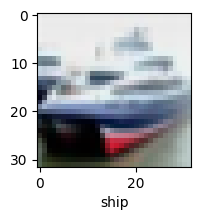

In [ ]:
plot_sample(X_test, y_test,1)


In [ ]:
print("classification report:\n",classification_report(y_test,y_classes))

classification report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1000
           1       0.78      0.79      0.78      1000
           2       0.60      0.53      0.56      1000
           3       0.48      0.43      0.45      1000
           4       0.62      0.57      0.60      1000
           5       0.56      0.64      0.59      1000
           6       0.65      0.81      0.72      1000
           7       0.71      0.73      0.72      1000
           8       0.79      0.80      0.79      1000
           9       0.81      0.72      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

